# Tutorial on how to segment just the walls from the images

Learn how you can create the masks of just the walls using the ADE20K dataset.

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import json

## Path to all images

In [8]:
from constants import TRAINING_ODGT_PATH

ABSOLUTE_PATH = globals()['_dh'][0]
ODGT = os.path.join(ABSOLUTE_PATH, TRAINING_ODGT_PATH)
train_samples = [json.loads(x.rstrip()) for x in open(ODGT, 'r')]

## Visualization functions

In [9]:
def plot_img(img, nrows, ncols, index, cmap, title=None):
    """
    Plot an image
    """
    
    plt.subplot(nrows, ncols, index)
    if not(title == None):
        plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img, cmap=cmap)

def plot_img_and_segm(index, colorize=False, cmap='viridis', mode=3):
    """
    Visualize an image and its segmentation.
    
    If colorize is True, it'll show also the four layers of the segmentation
    """
    
    img = Image.open(os.path.join("data", train_samples[index]['fpath_img']))
    segm = np.array(Image.open(os.path.join("data", train_samples[index]['fpath_segm'])))
    
    plt.figure(figsize=(15, 10))
    
    if colorize:
        plot_img(img, nrows=1, ncols=5, index=1, cmap=cmap, title="Original image") # plot image
        
        # Colorize the image (gray -> viridis)
        cm = plt.get_cmap(cmap)
        segm = cm(segm)
        
        for i in range(segm.shape[2]):
            plot_img(segm[:, :, i], nrows=1, ncols=5, index=i+2, cmap=cmap, title=f"segm[:, :, {i}]")
    else:
        plot_img(img, nrows=1, ncols=2, index=1, cmap=cmap, title="Original image") # plot image
    
        if mode == 1:
            segm = np.array(segm, dtype=np.int16)
        elif mode == 2:
            segm = np.array(segm, dtype=np.int16)
            segm[segm > 0] = 1
        else:
            segm = np.array(segm, dtype=np.int16) - 1
            segm[segm > 0] = 1
            
        plot_img(segm, nrows=1, ncols=2, index=2, cmap=cmap, title="Segmentation")
    
    plt.show()

def plot_img_and_segm_list(num_images=None, colorize=False, print_shape=False, cmap='viridis', mode=3):
    """
    Plot multiple images containing walls.
    
    num_images is the number of images to visualize.
    """
    idx_images_with_walls_list = [2, 5, 6, 8, 10, 12]
    if num_images == None:
        num_images = len(idx_images_with_walls_list)
    
    for idx in idx_images_with_walls_list[:num_images]:
        plot_img_and_segm(idx, colorize, cmap=cmap, mode=mode)

## Plot the actual image of the dataset

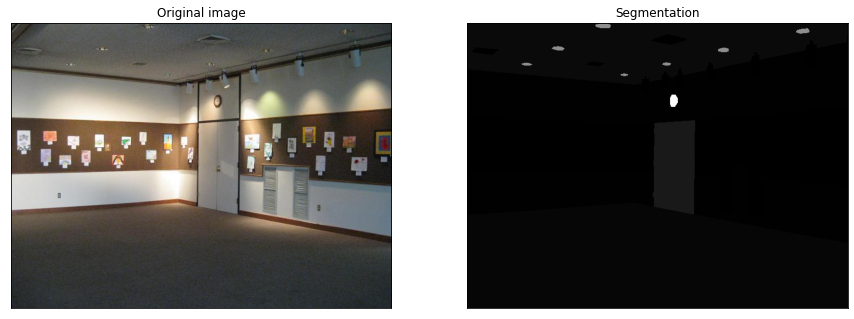

In [12]:
# Example of segm
# [[6 6 6 ... 6 6 0]
#  [6 6 6 ... 6 6 0]
#  ...
#  [4 4 4 ... 4 4 4]
#  [4 4 4 ... 4 4 4]]
plot_img_and_segm_list(num_images=1, colorize=False, cmap='gray', mode=1)

## Plot the image substituing all the values of the pixels greater than 0 (pure black) by 1 (white)

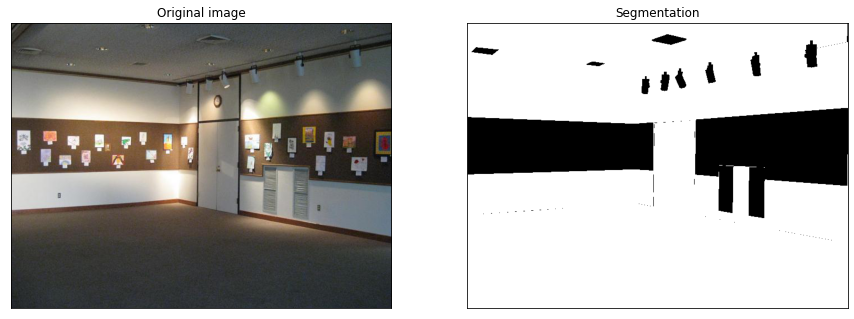

In [13]:
# Example of segm and segm[segm > 0] = 1
# [[1 1 1 ... 1 1 0]
#  [1 1 1 ... 1 1 0]
#  ...
#  [1 1 1 ... 1 1 1]
#  [1 1 1 ... 1 1 1]]
plot_img_and_segm_list(num_images=1, colorize=False, cmap='gray', mode=2)

## Plot the image subtracting 1 to all the pixels and substituing all the values of the pixels greater than 0 by 1

A problem I had is that I was substituing only the pure black pixels by white. The thing is that walls were a little bit clearer (~0.2). So subtracting 1 to all pixels made the almost black pixels, pure black (less or equal to 0). And then, I could apply the mask (segm[segm > 0] = 1).

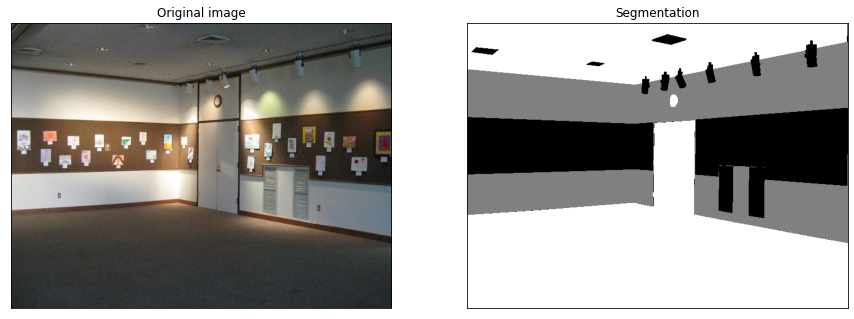

In [14]:
# Example of segm - 1 and segm[segm > 0] = 1
# [[ 1  1  1 ...  1  1 -1]
#  [ 1  1  1 ...  1  1 -1]
#  ...
#  [ 1  1  1 ...  1  1  1]
#  [ 1  1  1 ...  1  1  1]]
plot_img_and_segm_list(num_images=1, colorize=False, cmap='gray')